**DSO574 - Airbnb Assignment**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

path = "/content/drive/MyDrive/DSO574 - Airbnb"
os.chdir(path)
import pandas as pd
path = './Combined Listing Data [Summary].csv'
data = pd.read_csv(path)
data.head()

<ipython-input-2-ab8f3d6250e5>:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [ ]:
# Extract the year, month, and a combined date from the 'Scrape File' column of a dataframe
data['year'] = data['Scrape File'].apply(lambda x: x.split('_')[2])
data['month'] = data['Scrape File'].apply(lambda x: x.split('_')[3])
data['date'] = data['Scrape File'].apply(lambda x: x.split('_')[2] + x.split('_')[3])
data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month,date
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,...,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015,05,201505
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,...,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015,05,201505
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,...,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015,05,201505
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,...,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015,05,201505
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,...,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015,05,201505


In [ ]:
data['year'] = pd.to_datetime(data['year'])

# Filter data for years in 2018, 2019, 2020, and 2021
data_filtered = data[data['year'].dt.year.isin([2018, 2019, 2020, 2021])]
data_filtered.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month,date
244104,0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,NaN,Culver City,33.982095,-118.384935,Entire home/apt,...,7,2,2016-05-15,0.03,1,344.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803
244105,1,344,Family perfect;Pool;Near Studios!,767,Melissa,NaN,Burbank,34.165616,-118.334582,Entire home/apt,...,1,1,2016-12-30,0.05,1,0.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803
244106,2,2404,deleted,2633,Jjjj,NaN,Del Rey,33.984640,-118.440064,Shared room,...,1,0,NaN,NaN,1,365.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803
244107,3,2732,Zen Life at the Beach,3041,Yoga Priestess,NaN,Santa Monica,34.004750,-118.481266,Private room,...,1,17,2017-06-14,0.21,2,313.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803
244108,4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,NaN,Bellflower,33.876189,-118.113968,Entire home/apt,...,2,0,NaN,NaN,2,0.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803


<ipython-input-8-432fc3197c1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['last_review'] = pd.to_datetime(data_drop['last_review'])
<ipython-input-8-432fc3197c1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['last_review_year'] = pd.DatetimeIndex(data_drop['last_review']).year.astype(int)
<ipython-input-8-432fc3197c1e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Text(0, 0.5, 'Number of Listing Exit')

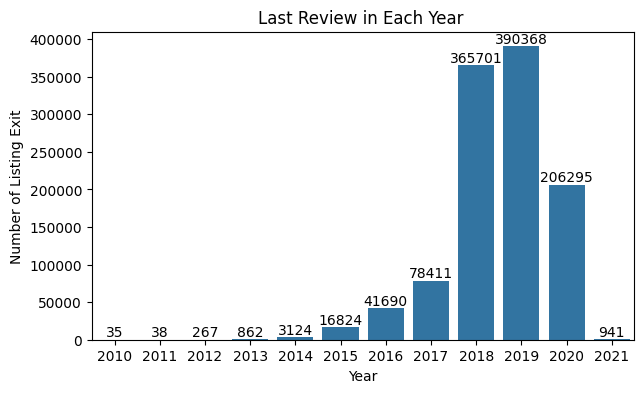

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Separate the year and month of the date for the convenience of analysis
data_drop = data_filtered.dropna(subset=['last_review'])
data_drop['last_review'] = pd.to_datetime(data_drop['last_review'])
data_drop['last_review_year'] = pd.DatetimeIndex(data_drop['last_review']).year.astype(int)
data_drop['last_review_month'] = pd.DatetimeIndex(data_drop['last_review']).month.astype(int)

# Create a dataframe group by the year
df_host_left = data_drop.groupby('last_review_year')['id'].count().reset_index(name='host_left_count')
df_host_left = df_host_left.set_index(['last_review_year'])
#Sum the number of hosts in each year
df_host_left['sum_left_count'] = df_host_left['host_left_count'].cumsum()

# Visualizing Data
fig, axs = plt.subplots(figsize=(7,4))
ax =sns.barplot(x=df_host_left.index,y="host_left_count",data=df_host_left)
ax.bar_label(ax.containers[0])
plt.title('Last Review in Each Year ')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Listing Exit')

# Interpretation: The number of hosts leaving has been rising, reaching a peak in 2019 and starting to decline in 2020.
# We disregard the data in 2021 due to incomplete information.

**Booking Trend**    
We utilized the last review date of a listing as an indicator of when a host last had an active booking.
The significant drop in the last reviews in 2020 could imply that many hosts either left the platform or have not had bookings that led to reviews during this period.  

(array([0, 1, 2, 3]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021')])

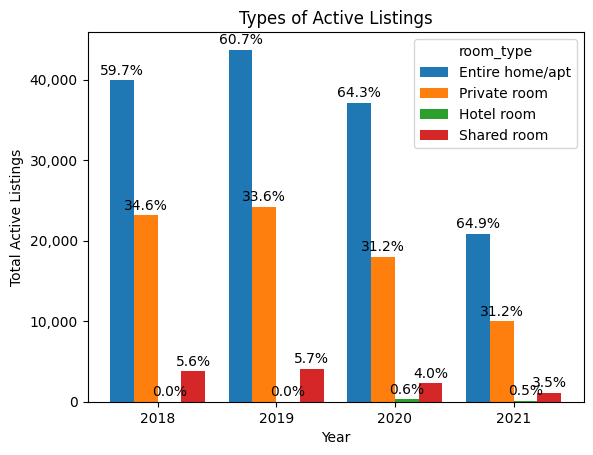

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

unique_ids = data_filtered.drop_duplicates(subset=['id', 'year'])


#Calculate the number and percentage of listings for each type of accommodation in 2019 and 2020
listing_types = pd.crosstab(index=unique_ids['room_type'], columns=unique_ids['year'])
listing_types_per = pd.crosstab(index=unique_ids['room_type'], columns=unique_ids['year'], normalize='columns')
listing_types = listing_types.loc[['Entire home/apt', 'Private room','Hotel room', 'Shared room']]
listing_types_per = listing_types_per.loc[['Entire home/apt', 'Private room','Hotel room', 'Shared room']]

#Plot Types of Active Listings
fig, ax = plt.subplots()

listing_types.T.plot.bar(ax=ax,width=0.8)

ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim(-1000,31000)

ax.set_xlabel('Year')
ax.set_ylabel('Total Active Listings')
ax.set_title('Types of Active Listings')

for i,p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    value = listing_types_per.T.unstack().iloc[i]
    ax.annotate(f'{value:.1%}', (x + width/2, y + height+700), ha='center')

# plt.figure(figsize=(12, 8))  # Set the figure size
plt.autoscale()
labels = ['2018','2019', '2020', '2021']
ax.set_xticklabels(labels)
plt.xticks(rotation=0)

**Active Listings in Different Room Types**  
The distribution of room types remained consistent with no significant changes in the proportion of each type.

In [ ]:
pivot_room_type = pd.pivot_table(data=data_filtered,
                                 index='date',
                                 columns='room_type',
                                 values='id',
                                 aggfunc='count')  # 'count' here will count unique IDs after duplicates are removed

print(pivot_room_type)

room_type  Entire home/apt  Hotel room  Private room  Shared room
date                                                             
201803             23263.0         NaN       13829.0       1720.0
201804             23837.0         NaN       14028.0       1686.0
201805             23963.0         NaN       14031.0       1824.0
201806             24097.0         NaN       13843.0       1690.0
201807             24617.0         NaN       13964.0       1790.0
201808             26098.0         NaN       14309.0       1892.0
201809             26600.0         NaN       14608.0       1944.0
201810             26823.0         NaN       14863.0       2029.0
201811             27355.0         NaN       15019.0       2080.0
201812             26792.0         NaN       14251.0       1949.0
201901             27041.0         NaN       14459.0       1842.0
201902             27105.0         NaN       14612.0       1952.0
201903             26959.0         NaN       14395.0       1789.0
201904    

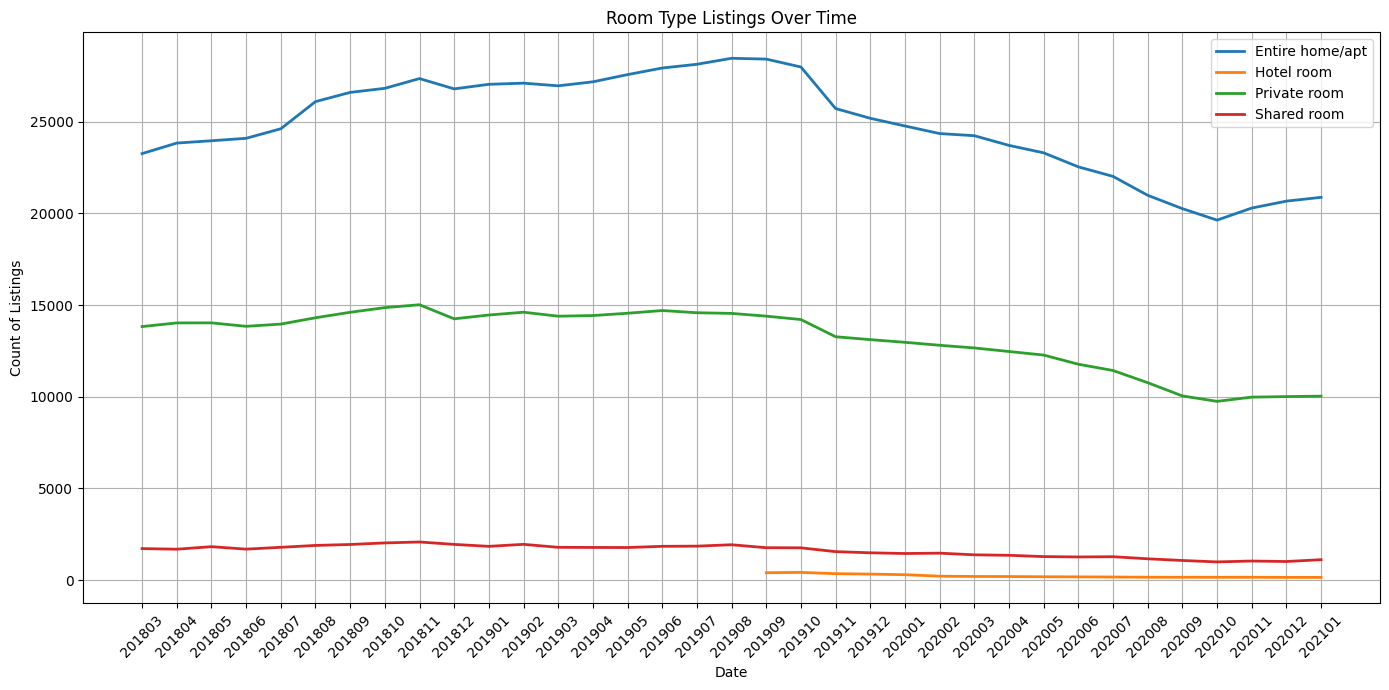

In [ ]:
plt.figure(figsize=(14, 7))
for column in pivot_room_type.columns:
    plt.plot(pivot_room_type.index, pivot_room_type[column], marker='', linewidth=2, label=column)

plt.title('Room Type Listings Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Listings')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Active Listings Trend**    
 The Home-Sharing Ordinance implemented in LA in 2019 led to a sudden drop in active listings, particularly noticeable in September of that year. However, we believe that the prolonged decline in listings was largely influenced by the onset of the COVID-19 pandemic.

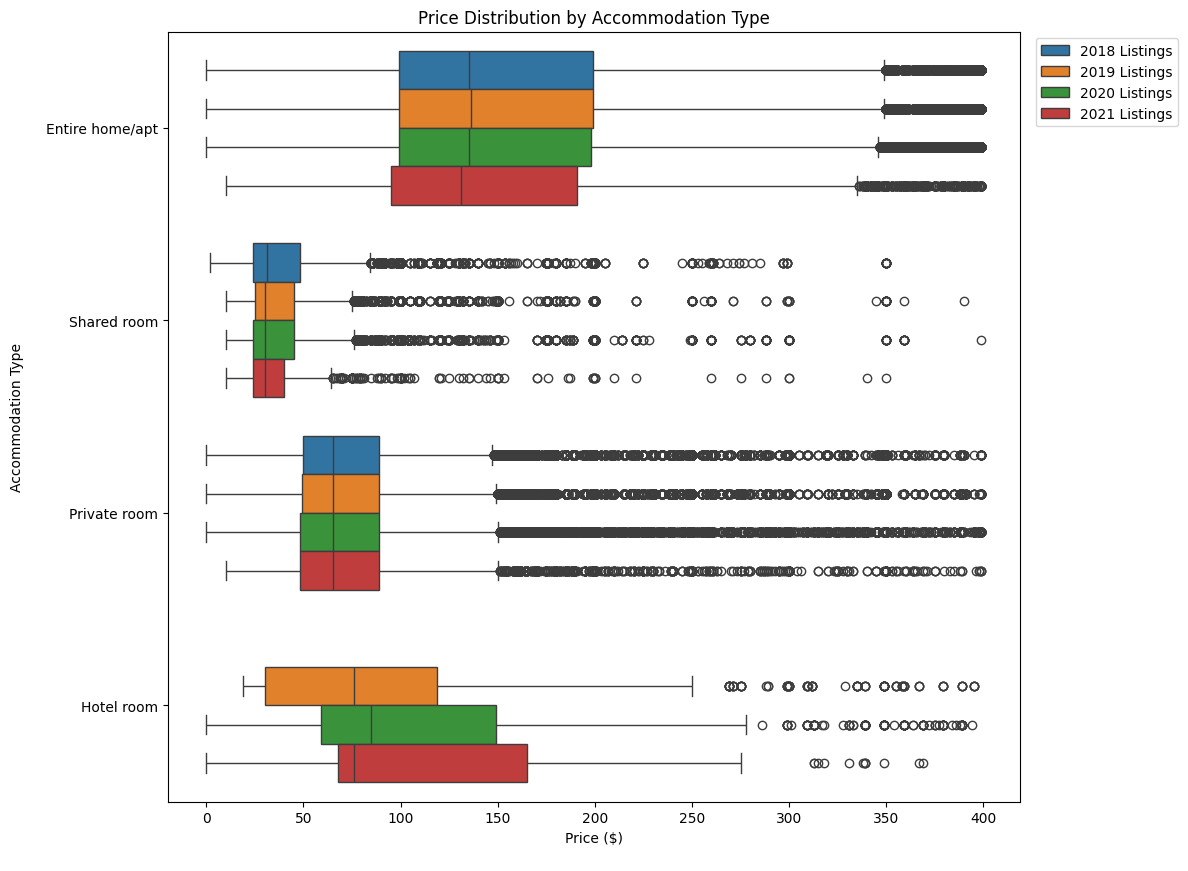

<Figure size 1200x800 with 0 Axes>

In [ ]:
import seaborn as sns
# Plot price Distribution by Accommodation Type
fig, ax = plt.subplots(figsize=(11, 10))

combined_price_cleaned = data_filtered[data_filtered.price<400]
sns.boxplot(x='price', y='room_type', hue='year',
            data=combined_price_cleaned, orient='h', ax=ax).set(xlabel='Price ($)\n', ylabel='Accommodation Type\n')
ax.set_title('Price Distribution by Accommodation Type')
legend_labels = ['2018 Listings','2019 Listings', '2020 Listings', '2021 Listings']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=legend_labels, facecolor='white', loc='upper left', bbox_to_anchor=(1.01, 1))

plt.figure(figsize=(12, 8))
plt.show()


****

In [ ]:
# Do the Geographical Cluster
from sklearn.cluster import KMeans

latitude_data = data_filtered[['latitude', 'longitude']]

clusters = KMeans(n_clusters=5).fit(latitude_data)

data_filtered['Geographical_Cluster'] = clusters.predict(latitude_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-7d96f2e5159f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Geographical_Cluster'] = clusters.predict(latitude_data)


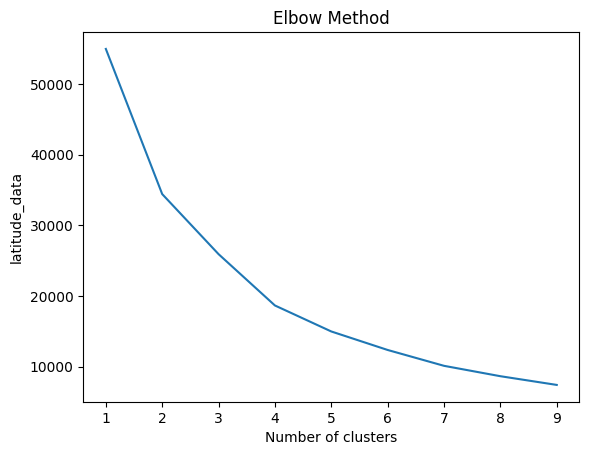

In [ ]:
# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(latitude_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('latitude_data')
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


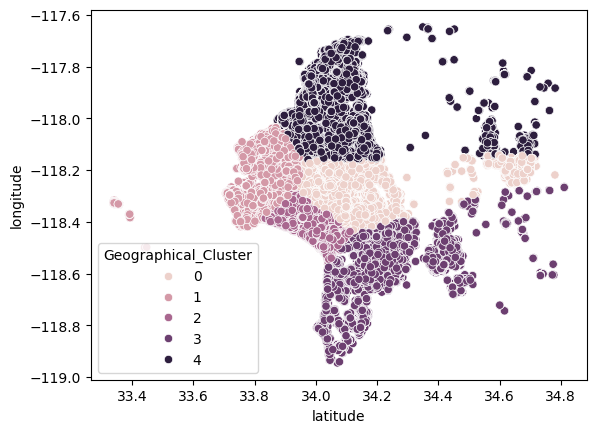

In [ ]:
sns.scatterplot(data = data_filtered,
                x = 'latitude',
                y = 'longitude',
                hue = 'Geographical_Cluster')

In [ ]:
data_filtered.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month,date,Geographical_Cluster
244104,0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,NaN,Culver City,33.982095,-118.384935,Entire home/apt,...,2,2016-05-15,0.03,1,344.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803,2
244105,1,344,Family perfect;Pool;Near Studios!,767,Melissa,NaN,Burbank,34.165616,-118.334582,Entire home/apt,...,1,2016-12-30,0.05,1,0.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803,0
244106,2,2404,deleted,2633,Jjjj,NaN,Del Rey,33.984640,-118.440064,Shared room,...,0,NaN,NaN,1,365.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803,2
244107,3,2732,Zen Life at the Beach,3041,Yoga Priestess,NaN,Santa Monica,34.004750,-118.481266,Private room,...,17,2017-06-14,0.21,2,313.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803,2
244108,4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,NaN,Bellflower,33.876189,-118.113968,Entire home/apt,...,0,NaN,NaN,2,0.0,los_angeles_2018_03_listings.csv,2018-01-01,03,201803,1


In [ ]:
# cluster_means of Geographical_Cluster
cluster_means = data_filtered.groupby(['Geographical_Cluster', 'year'])['price'].mean().reset_index()
print(cluster_means)

    Geographical_Cluster       year       price
0                      0 2018-01-01  190.475301
1                      0 2019-01-01  198.449786
2                      0 2020-01-01  219.689425
3                      0 2021-01-01  209.921711
4                      1 2018-01-01  157.753960
5                      1 2019-01-01  164.702411
6                      1 2020-01-01  180.722280
7                      1 2021-01-01  166.125299
8                      2 2018-01-01  216.250372
9                      2 2019-01-01  229.164334
10                     2 2020-01-01  246.525898
11                     2 2021-01-01  235.815385
12                     3 2018-01-01  324.904433
13                     3 2019-01-01  341.017286
14                     3 2020-01-01  404.958569
15                     3 2021-01-01  428.626634
16                     4 2018-01-01  110.530838
17                     4 2019-01-01  108.337270
18                     4 2020-01-01  114.867763
19                     4 2021-01-01  123

<ipython-input-24-af178ac948f6>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#80b280'` for the same effect.

  a = sns.barplot(data=cluster_means[cluster_means['Geographical_Cluster'] == i], x='year', y='price', hue='year', color =(0.5, 0.7, 0.5, 0.8), width = 0.5)


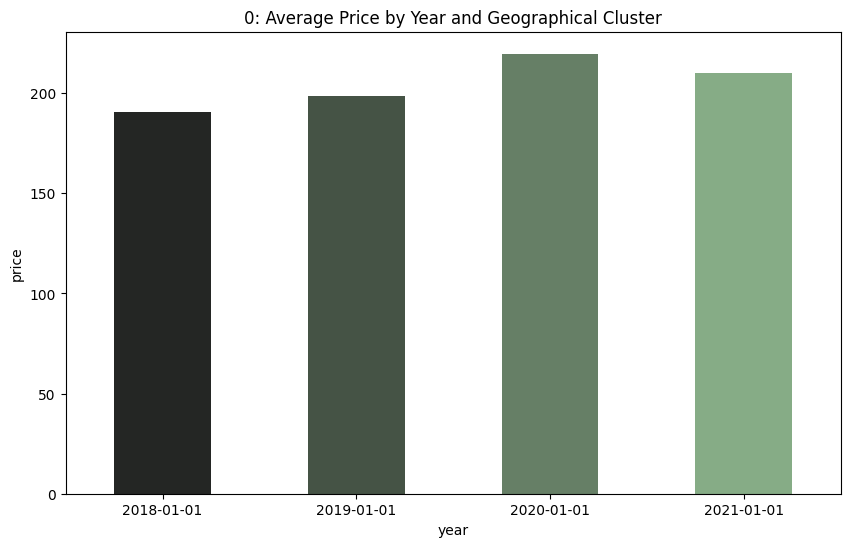

<ipython-input-24-af178ac948f6>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#80b280'` for the same effect.

  a = sns.barplot(data=cluster_means[cluster_means['Geographical_Cluster'] == i], x='year', y='price', hue='year', color =(0.5, 0.7, 0.5, 0.8), width = 0.5)


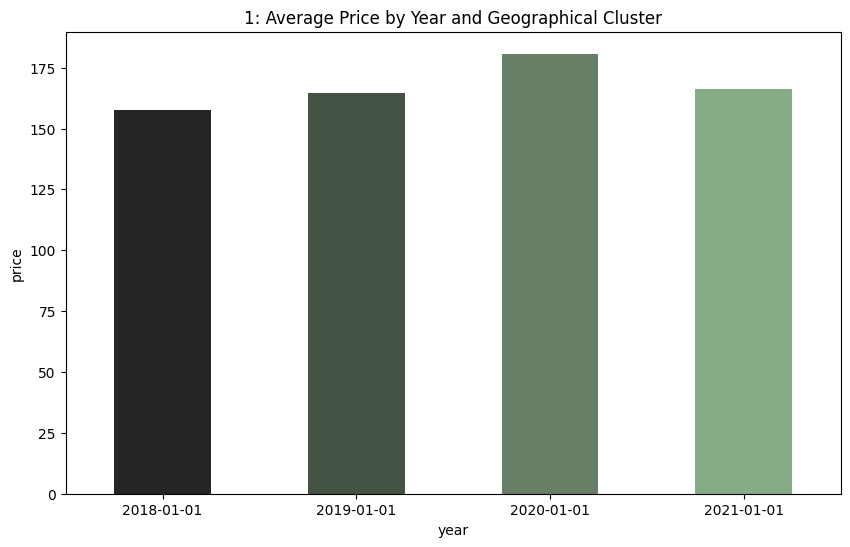

<ipython-input-24-af178ac948f6>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#80b280'` for the same effect.

  a = sns.barplot(data=cluster_means[cluster_means['Geographical_Cluster'] == i], x='year', y='price', hue='year', color =(0.5, 0.7, 0.5, 0.8), width = 0.5)


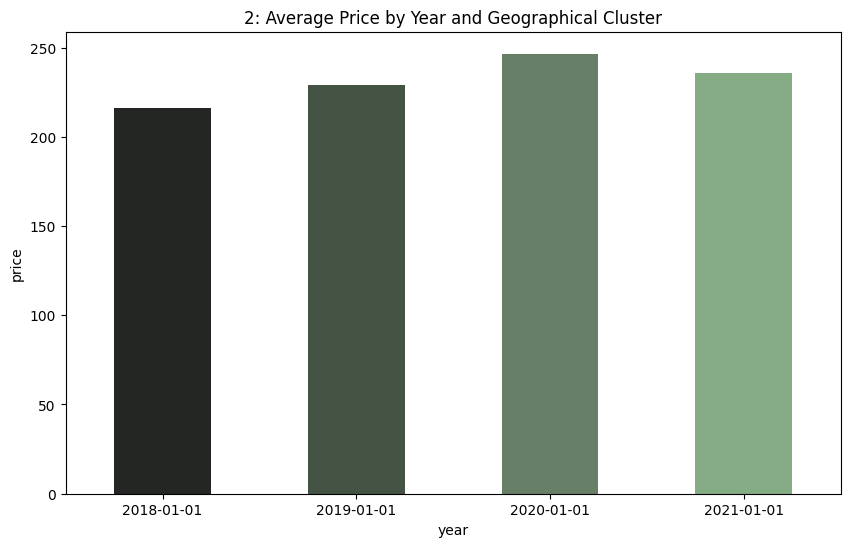

<ipython-input-24-af178ac948f6>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#80b280'` for the same effect.

  a = sns.barplot(data=cluster_means[cluster_means['Geographical_Cluster'] == i], x='year', y='price', hue='year', color =(0.5, 0.7, 0.5, 0.8), width = 0.5)


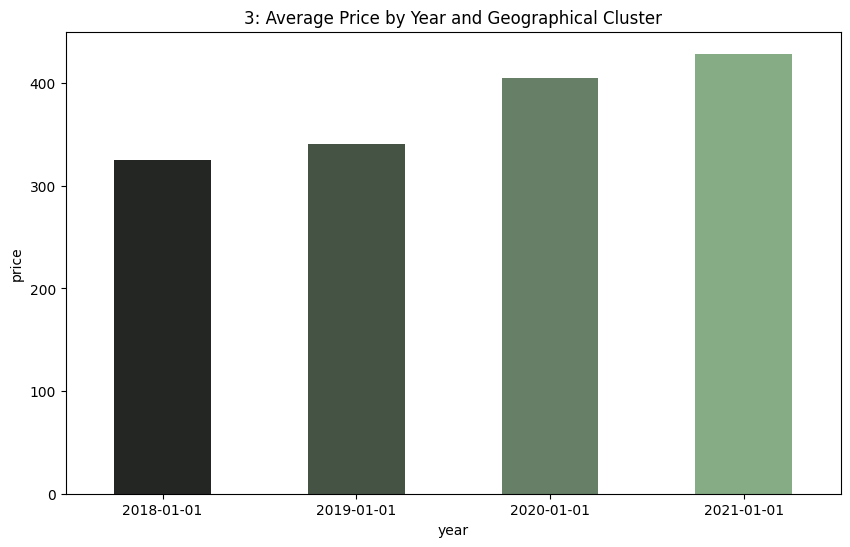

<ipython-input-24-af178ac948f6>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#80b280'` for the same effect.

  a = sns.barplot(data=cluster_means[cluster_means['Geographical_Cluster'] == i], x='year', y='price', hue='year', color =(0.5, 0.7, 0.5, 0.8), width = 0.5)


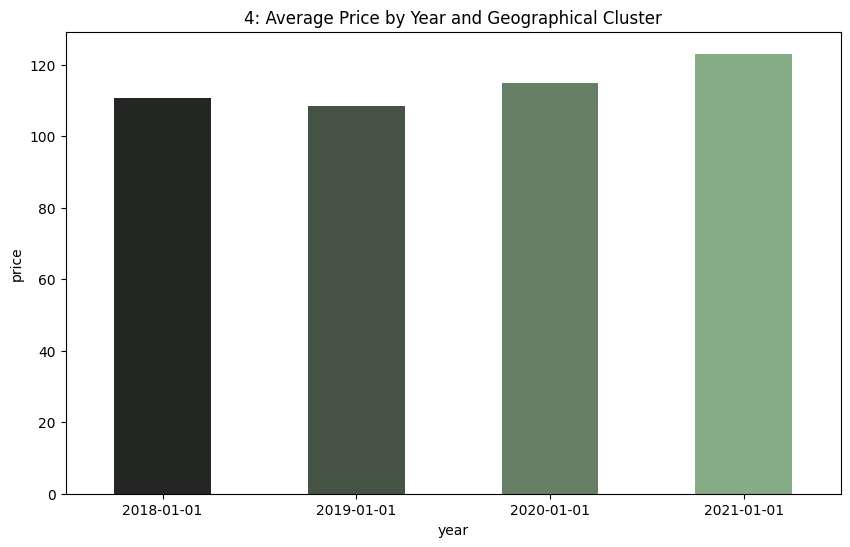

In [ ]:
# Draw the bar chart to observe the price trend in each year (Seperated by Geographical_Cluster)
room_type = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']
for i in range(5):
  plt.figure(figsize=(10, 6))
  a = sns.barplot(data=cluster_means[cluster_means['Geographical_Cluster'] == i], x='year', y='price', hue='year', color =(0.5, 0.7, 0.5, 0.8), width = 0.5)
  plt.title(f'{i}: Average Price by Year and Geographical Cluster')
  plt.show()

<ipython-input-25-94c23dc43110>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#80b280'` for the same effect.

  a = sns.barplot(data=cluster_means, x='Geographical_Cluster', y='price', hue='year', width = 0.5, color = custom_color)


Text(0.5, 1.0, 'Average Price by Year and Geographical Cluster')

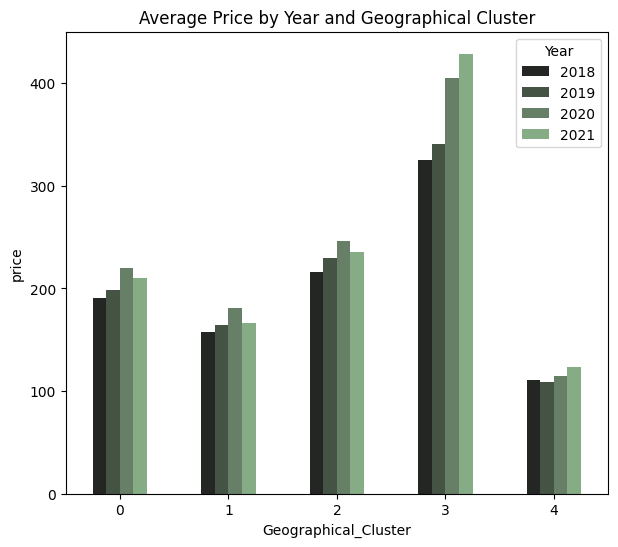

In [ ]:
# Combine the chart above together to provide an overall picture of price change
plt.figure(figsize=(7, 6))
custom_color = (0.5, 0.7, 0.5, 0.8) # decided color
a = sns.barplot(data=cluster_means, x='Geographical_Cluster', y='price', hue='year', width = 0.5, color = custom_color)
handles, labels = a.get_legend_handles_labels()
plt.legend(handles=handles, title='Year', labels = ['2018', '2019', '2020', '2021'])
plt.title('Average Price by Year and Geographical Cluster')

In [ ]:
cluster_means_roomType = data_filtered.groupby(['room_type', 'year'])['price'].mean().reset_index()
print(cluster_means_roomType)

          room_type       year       price
0   Entire home/apt 2018-01-01  270.468989
1   Entire home/apt 2019-01-01  278.323537
2   Entire home/apt 2020-01-01  295.440111
3   Entire home/apt 2021-01-01  285.018153
4        Hotel room 2019-01-01  185.674419
5        Hotel room 2020-01-01  340.215739
6        Hotel room 2021-01-01  489.671141
7      Private room 2018-01-01   87.724222
8      Private room 2019-01-01   88.751414
9      Private room 2020-01-01  108.504597
10     Private room 2021-01-01  102.103359
11      Shared room 2018-01-01   56.124328
12      Shared room 2019-01-01   52.942792
13      Shared room 2020-01-01   57.276194
14      Shared room 2021-01-01   52.495964


Text(0.5, 1.0, 'Average Price by Year and Room type')

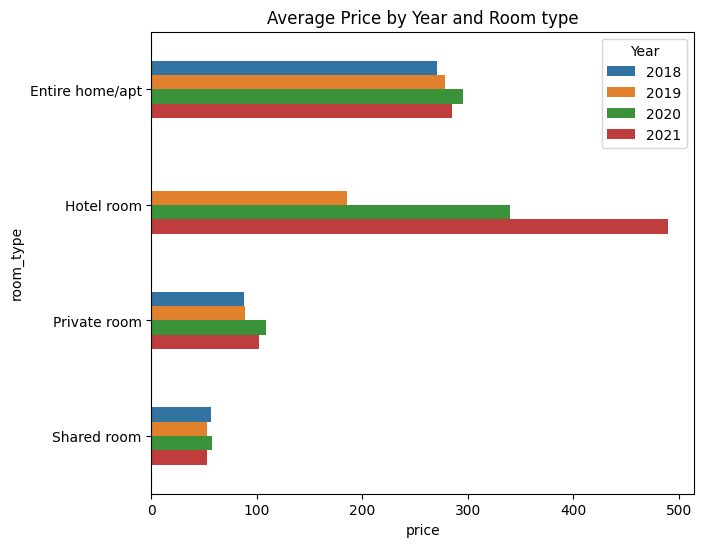

In [ ]:
# Average Price by Year and Room type
plt.figure(figsize=(7, 6))

a = sns.barplot(data=cluster_means_roomType, x='price', y='room_type', hue='year', width = 0.5)
handles, labels = a.get_legend_handles_labels()
plt.legend(handles=handles, title='Year', labels = ['2018', '2019', '2020', '2021'])
plt.title('Average Price by Year and Room type')

**Price Distribution in Different Room Types**  
Looking at prices across all room types, there was a notable uptick in average prices in 2020. This trend could be attributed to a decrease in the overall volume of active listings.

In [ ]:
import statsmodels.formula.api as sm
# Use regression model to test relationships among price and other independent variables (Pre-Covid)
Reg_model_Before_Covid = sm.ols(formula='price ~ reviews_per_month + minimum_nights + C(Geographical_Cluster) + C(room_type) + availability_365 + calculated_host_listings_count', data=data_filtered[(data_filtered['year'] < '2020-01-01')])
result_Before_Covid = Reg_model_Before_Covid.fit()
print(result_Before_Covid.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     6383.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:26:31   Log-Likelihood:            -5.2468e+06
No. Observations:              748141   AIC:                         1.049e+07
Df Residuals:                  748129   BIC:                         1.049e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
# Use regression model to test relationships among price and other independent variables (Post-Covid)
Reg_model_After_Covid = sm.ols(formula='price ~ reviews_per_month + minimum_nights + C(Geographical_Cluster) + C(room_type) + availability_365 + calculated_host_listings_count', data=data_filtered[(data_filtered['year'] >= '2020-01-01')])
result_After_Covid = Reg_model_After_Covid.fit()
print(result_After_Covid.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2191.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:26:34   Log-Likelihood:            -2.5783e+06
No. Observations:              356253   AIC:                         5.157e+06
Df Residuals:                  356241   BIC:                         5.157e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**Interpretation**  
We haven't find out obvious difference between Pre-Covid and Post-Covid in Regression models

In [ ]:
data_filtered[(data_filtered['year'] >= '2020-01-01')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452889 entries, 1180721 to 1633609
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      452889 non-null  int64         
 1   id                              452889 non-null  int64         
 2   name                            452867 non-null  object        
 3   host_id                         452889 non-null  int64         
 4   host_name                       452366 non-null  object        
 5   neighbourhood_group             452889 non-null  object        
 6   neighbourhood                   452889 non-null  object        
 7   latitude                        452889 non-null  float64       
 8   longitude                       452889 non-null  float64       
 9   room_type                       452889 non-null  object        
 10  price                           452889 non-null  

In [ ]:
# one way anova
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data_2018 = data_filtered[data_filtered['year'] == '2018']['price']
data_2019 = data_filtered[data_filtered['year'] == '2019']['price']
data_2020 = data_filtered[data_filtered['year'] == '2020']['price']
data_2021 = data_filtered[data_filtered['year'] == '2021']['price']

f_stat, p_value_anova = f_oneway(data_2018, data_2019, data_2020, data_2021)
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.4f}")

ANOVA: f_stat=188.23, p_value=0.0000


**Interpretation**  
The difference of mean among each year is statistically significant.

In [ ]:
alpha = 0.01  # significance level

from scipy.stats import ttest_ind  # Importing the ttest_ind function

# Prepare the data for Tukey's HSD test
data_concat = pd.concat([data_2018, data_2019, data_2020])
labels = ['2018'] * len(data_2018) + ['2019'] * len(data_2019) + ['2020'] * len(data_2020)

# Perform Tukey's HSD Test
print("\nTukey's HSD Test:")
tukey = pairwise_tukeyhsd(endog=data_concat, groups=labels, alpha=alpha)
print(tukey)

# Perform pairwise t-tests with Bonferroni correction
print("\nPairwise t-tests with Bonferroni Correction:")
comparisons = [('2018', '2019'), ('2018', '2020'), ('2019', '2020')]
bonferroni_alpha = alpha / len(comparisons)
for group1, group2 in comparisons:
    stat, p = ttest_ind(data_filtered[data_filtered['year'] == group1]['price'], data_filtered[data_filtered['year'] == group2]['price'], equal_var = False)
    print(f"{group1} vs {group2}: t={stat:.2f}, p={p:.4f}, p<{bonferroni_alpha} -> {'Significant' if p < bonferroni_alpha else 'Not Significant'}")


Tukey's HSD Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  2018   2019   8.6457   0.0  5.1926 12.0988   True
  2018   2020  28.4991   0.0 24.8669 32.1314   True
  2019   2020  19.8535   0.0 16.4139  23.293   True
---------------------------------------------------

Pairwise t-tests with Bonferroni Correction:
2018 vs 2019: t=-7.95, p=0.0000, p<0.0033333333333333335 -> Significant
2018 vs 2020: t=-22.44, p=0.0000, p<0.0033333333333333335 -> Significant
2019 vs 2020: t=-15.74, p=0.0000, p<0.0033333333333333335 -> Significant


**Interpretation**  
The mean in 2018 and 2019 both have significant differences with the mean in 2020

Correlation coefficient between price and availability (Pre Covid): 0.08855756453070629
Correlation coefficient between price and availability (Post Covid): 0.06889539234833944


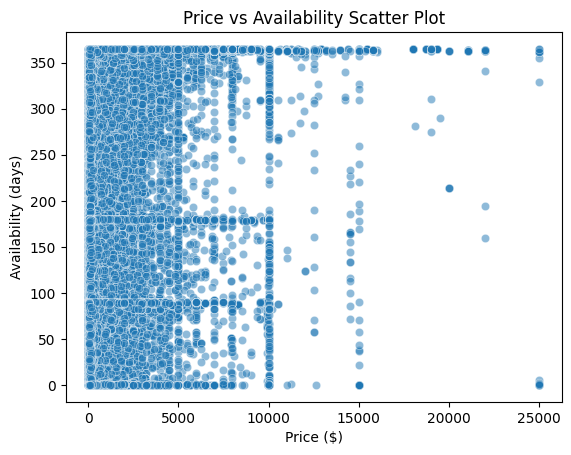

In [ ]:
# Correlation of price and availability_365
Pre_covid = data_filtered[data_filtered['year'] < '2020']
Post_covid = data_filtered[data_filtered['year'] >= '2020']

correlation = Pre_covid['price'].corr(Pre_covid['availability_365'])
print(f"Correlation coefficient between price and availability (Pre Covid): {correlation}")

correlation = Post_covid['price'].corr(Post_covid['availability_365'])
print(f"Correlation coefficient between price and availability (Post Covid): {correlation}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(data=data_filtered, x='price', y='availability_365', alpha=0.5)
plt.title('Price vs Availability Scatter Plot')
plt.xlabel('Price ($)')
plt.ylabel('Availability (days)')
plt.show()

**Interpretation**  
Correlation coefficient between price and availability are both small in Prd Covid and Post Covid, indicates that Price and availability-365 are not really correlated with each other.

**Conclusion**  
The increase in prices between 2019 and 2020 cannot solely be attributed to factors related to the Airbnb market. While there was a decline in the number of listings during this period, the increase in minimum nights, possibly due to factors such as quarantine measures, mitigated any significant changes in availability throughout the year. However, the notable decrease in reviews per month suggests a decline in customer demand.